In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import numpy as np
from tqdm import tqdm

In [3]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")
df = pd.read_csv(os.path.join(path,os.listdir(path)[0]))

In [4]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
transactions = []
for idx in tqdm(df['Member_number'].unique()):
    temp = df[df['Member_number'] == idx]
    transactions.append(temp['itemDescription'].to_list())

100%|██████████| 3898/3898 [00:00<00:00, 10497.27it/s]


In [ ]:
transactions = [[str(item) for item in transaction] for transaction in transactions]

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
dataset = pd.DataFrame(te_ary,columns=te.columns_)

In [217]:
freq_itemset = apriori(dataset, min_support=0.01, use_colnames= True)
rules = association_rules(freq_itemset, metric='confidence',min_threshold=0.2)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5820,"(other vegetables, whole milk, sausage)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,0.007998,1.218025
5813,"(other vegetables, yogurt, rolls/buns)","(whole milk, sausage)",0.052335,0.106978,0.013597,0.259804,2.428575,0.007998,1.206467
4901,"(curd, yogurt)","(whole milk, sausage)",0.040277,0.106978,0.010005,0.248408,2.322046,0.005696,1.188173
5819,"(whole milk, sausage, rolls/buns)","(other vegetables, yogurt)",0.048743,0.120318,0.013597,0.278947,2.318415,0.007732,1.219997
5814,"(whole milk, yogurt, rolls/buns)","(other vegetables, sausage)",0.065931,0.092868,0.013597,0.206226,2.220629,0.007474,1.142808
...,...,...,...,...,...,...,...,...,...
3082,"(other vegetables, long life bakery product)",(whole milk),0.026424,0.458184,0.011031,0.417476,0.911154,-0.001076,0.930118
556,(packaged fruit/vegetables),(other vegetables),0.031811,0.376603,0.010775,0.338710,0.899380,-0.001205,0.942697
447,(herbs),(rolls/buns),0.039251,0.349666,0.012314,0.313725,0.897213,-0.001411,0.947629
449,(herbs),(soda),0.039251,0.313494,0.011031,0.281046,0.896495,-0.001274,0.954867


In [227]:
rules[(rules['antecedents'] == {'whole milk'})&(rules['consequents'] & {'butter'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
fp_freq_itemset = fpgrowth(dataset,min_support=0.01, use_colnames=True)

fp_rules = association_rules(fp_freq_itemset,metric='confidence',min_threshold=0.6)

fp_rules

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [15]:
raw_ = pd.DataFrame(online_retail.variables)

In [24]:
online_retail['data']['features']

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [29]:
transactions = []
for idx in tqdm(online_retail['data']['features']['CustomerID'].unique()):
    temp = online_retail['data']['features'][online_retail['data']['features']['CustomerID'] == idx]
    transactions.append(temp['Description'].to_list())

100%|██████████| 4373/4373 [00:00<00:00, 4586.22it/s]


In [31]:
transactions = [[str(item) for item in transaction] for transaction in transactions]

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
dataset = pd.DataFrame(te_ary,columns=te.columns_)

In [33]:
fp_freq_itemset = fpgrowth(dataset,min_support=0.01, use_colnames=True)

fp_rules = association_rules(fp_freq_itemset,metric='confidence',min_threshold=0.6)

fp_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(HEART OF WICKER SMALL, WOODEN PICTURE FRAME W...",(HEART OF WICKER LARGE),0.035902,0.111365,0.024011,0.668790,6.005375,0.020013,2.682994
1,"(WOODEN PICTURE FRAME WHITE FINISH, HEART OF W...",(HEART OF WICKER SMALL),0.031100,0.131031,0.024011,0.772059,5.892170,0.019936,3.812250
2,"(WOODEN PICTURE FRAME WHITE FINISH, HEART OF W...",(WHITE HANGING HEART T-LIGHT HOLDER),0.031100,0.196204,0.023096,0.742647,3.785076,0.016994,3.123322
3,"(HEART OF WICKER SMALL, WHITE HANGING HEART T-...",(HEART OF WICKER LARGE),0.024468,0.111365,0.017837,0.728972,6.545779,0.015112,3.278756
4,"(HEART OF WICKER SMALL, WOODEN PICTURE FRAME W...",(WHITE HANGING HEART T-LIGHT HOLDER),0.024011,0.196204,0.017837,0.742857,3.786147,0.013126,3.125873
...,...,...,...,...,...,...,...,...,...
18779730,(HANGING HEN ON NEST DECORATION),(HEN HOUSE DECORATION),0.016465,0.018065,0.010290,0.625000,34.596519,0.009993,2.618492
18779731,(BABY BOOM RIBBONS ),(ROMANTIC PINKS RIBBONS ),0.016007,0.037046,0.011662,0.728571,19.666931,0.011069,3.547727
18779732,(BABY BOOM RIBBONS ),(CHOCOLATE BOX RIBBONS ),0.016007,0.037046,0.011205,0.700000,18.895679,0.010612,3.209848
18779733,(BABY BOOM RIBBONS ),(6 RIBBONS RUSTIC CHARM),0.016007,0.094443,0.011205,0.700000,7.411864,0.009693,3.018523


In [35]:
fp_freq_itemset.head()

,support,itemsets
0,0.196204,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.093986,(WOODEN PICTURE FRAME WHITE FINISH)
2,0.089641,(WOODEN FRAME ANTIQUE WHITE )
3,0.085753,(JUMBO SHOPPER VINTAGE RED PAISLEY)
4,0.068831,(HAND WARMER UNION JACK)


In [34]:
fp_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13502210,"(FRENCH BLUE METAL DOOR SIGN 4, FRENCH BLUE ME...","(FRENCH BLUE METAL DOOR SIGN 7, FRENCH BLUE ME...",0.010290,0.010519,0.010290,1.000000,95.065217,0.010182,inf
13502697,"(FRENCH BLUE METAL DOOR SIGN 5, FRENCH BLUE ME...","(FRENCH BLUE METAL DOOR SIGN 8, FRENCH BLUE ME...",0.010062,0.010519,0.010062,1.000000,95.065217,0.009956,inf
13502740,"(FRENCH BLUE METAL DOOR SIGN 8, FRENCH BLUE ME...","(FRENCH BLUE METAL DOOR SIGN 5, FRENCH BLUE ME...",0.010519,0.010062,0.010062,0.956522,95.065217,0.009956,22.768580
13502760,"(FRENCH BLUE METAL DOOR SIGN 4, FRENCH BLUE ME...","(FRENCH BLUE METAL DOOR SIGN 8, FRENCH BLUE ME...",0.010062,0.010519,0.010062,1.000000,95.065217,0.009956,inf
13502824,"(FRENCH BLUE METAL DOOR SIGN 4, FRENCH BLUE ME...","(FRENCH BLUE METAL DOOR SIGN 5, FRENCH BLUE ME...",0.010519,0.010062,0.010062,0.956522,95.065217,0.009956,22.768580
...,...,...,...,...,...,...,...,...,...
13831259,"(LUNCH BAG RED RETROSPOT, GREY HEART HOT WATER...",(REGENCY CAKESTAND 3 TIER),0.019437,0.202836,0.011662,0.600000,2.958061,0.007720,1.992911
16740213,"(JAM MAKING SET PRINTED, SET OF 4 PANTRY JELLY...",(REGENCY CAKESTAND 3 TIER),0.017151,0.202836,0.010290,0.600000,2.958061,0.006812,1.992911
8630178,"(COOK WITH WINE METAL SIGN , DOORMAT KEEP CALM...",(REGENCY CAKESTAND 3 TIER),0.017151,0.202836,0.010290,0.600000,2.958061,0.006812,1.992911
5777167,"(WHITE HANGING HEART T-LIGHT HOLDER, LUNCH BAG...",(REGENCY CAKESTAND 3 TIER),0.017151,0.202836,0.010290,0.600000,2.958061,0.006812,1.992911


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example data: Movie plot descriptions
documents = [
    "The movie is about a hero who saves the world",
    "A hero is needed to save the world from disaster",
    "This is a romantic story of two lovers",
    "The film depicts a tragic love story",
]

# 1. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Create a TF-IDF Vectorizer object
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)  # Transform documents into a TF-IDF matrix

# 2. Cosine Similarity calculation
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)  # Calculate cosine similarity

# Convert the TF-IDF matrix to dense format for better visualization
tfidf_matrix_dense = tfidf_matrix.todense()  # Convert to dense matrix
tfidf_matrix_dense, cosine_sim_matrix

(matrix([[0.        , 0.        , 0.        , 0.43779123, 0.        ,
          0.        , 0.55528266, 0.        , 0.        , 0.        ,
          0.55528266, 0.        , 0.        , 0.43779123],
         [0.        , 0.48546061, 0.        , 0.38274272, 0.        ,
          0.        , 0.        , 0.48546061, 0.        , 0.48546061,
          0.        , 0.        , 0.        , 0.38274272],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.61761437, 0.        , 0.        , 0.61761437, 0.        ,
          0.        , 0.48693426, 0.        , 0.        ],
         [0.46516193, 0.        , 0.46516193, 0.        , 0.46516193,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.36673901, 0.46516193, 0.        ]]),
 array([[1.        , 0.33512282, 0.        , 0.        ],
        [0.33512282, 1.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.17857779],
        [0.        , 0.     

In [55]:
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [51]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=[f"Document {i+1}" for i in range(len(documents))], columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,depicts,disaster,film,hero,love,lovers,movie,needed,romantic,save,saves,story,tragic,world
Document 1,0.000000,0.000000,0.000000,0.437791,0.000000,0.000000,0.555283,0.000000,0.000000,0.000000,0.555283,0.000000,0.000000,0.437791
Document 2,0.000000,0.485461,0.000000,0.382743,0.000000,0.000000,0.000000,0.485461,0.000000,0.485461,0.000000,0.000000,0.000000,0.382743
Document 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.617614,0.000000,0.000000,0.617614,0.000000,0.000000,0.486934,0.000000,0.000000
Document 4,0.465162,0.000000,0.465162,0.000000,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366739,0.465162,0.000000


In [56]:
import pandas as pd
import statsmodels.api as sm

# 데이터 준비
data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=365),
    'sales': [100 + i + (i % 7) * 10 for i in range(365)],  # 가상 판매량
    'temp': [20 + (i % 30) for i in range(365)],           # 기온
    'event': [0]*180 + [1]*50 + [0]*135                    # 이벤트 발생 여부
})
data.set_index('date', inplace=True)

# ARIMAX 모델 적용
exog = data[['temp', 'event']]
model = sm.tsa.SARIMAX(data['sales'], exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()

# 결과 요약
print(results.summary())

# 예측
forecast = results.predict(start=365, end=400, exog=exog.iloc[-36:])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01586D+01    |proj g|=  2.83562D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.836D+06  -1.016D+01
  F =  -10.158617605802590     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                  365
Model:        

/usr/local/src/python3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/src/python3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/usr/local/src/python3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


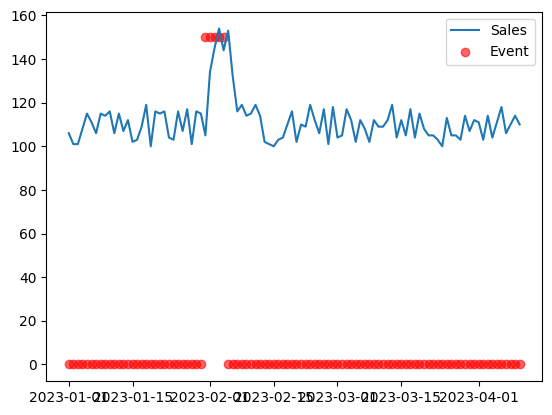

In [57]:
import numpy as np
import pandas as pd

# 데이터 생성
data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100),
    'sales': [100 + np.random.randint(0, 20) for _ in range(100)],
    'event': [0]*30 + [1]*5 + [0]*65  # 희소 이벤트
})

# 이벤트 효과 추가 (감쇠 효과)
event_dates = data[data['event'] == 1].index
for date in event_dates:
    for i in range(1, 5):
        if date + i < len(data):
            data.loc[date + i, 'sales'] += int(20 / i)  # 감쇠 효과

# 데이터 시각화
import matplotlib.pyplot as plt

plt.plot(data['date'], data['sales'], label='Sales')
plt.scatter(data['date'], data['event'] * 150, color='red', label='Event', alpha=0.6)
plt.legend()
plt.show()
